In [1]:
import numpy as np
import ospgrillage as og
%matplotlib inline

In [2]:
# Adopted units: N and m
kilo = 1e3
milli = 1e-3
N = 1
m = 1
mm = milli * m
m2 = m ** 2
m3 = m ** 3
m4 = m ** 4
kN = kilo * N
MPa = N / ((mm) ** 2)
GPa = kilo * MPa


# parameters of bridge grillage
L = 24 * m  # span
w = 9 * m  # width
n_l = 5  # number of longitudinal members
n_t = 15  # number of transverse members
edge_dist = 0.9 * m  # distance between edge beam and first exterior beam
bridge_name = "multi span showcase"
angle = 0 # degree
mesh_type = "Oblique"
# mesh_type = "Ortho"
# offset_beam_y = 0.499 * m
max_mesh_size_z = 2 * m
max_mesh_size_x = 2 * m
link_nodes_width = 0.89 * m

In [3]:
spans = [5* m, 14* m, 5* m]
nl_multi = [6,20,6]
stich_slab_x_spacing = 0.5 * m

In [4]:
concrete = og.create_material(material="concrete", code="AS5100-2017", grade="65MPa")

# define sections (parameters from LUSAS model)
edge_longitudinal_section = og.create_section(
    A=0.934 * m2,
    J=0.1857 * m3,
    Iz=0.3478 * m4,
    Iy=0.213602 * m4,
    Az=0.444795 * m2,
    Ay=0.258704 * m2,
)

longitudinal_section = og.create_section(
    A=1.025 * m2,
    J=0.1878 * m3,
    Iz=0.3694 * m4,
    Iy=0.113887e-3 * m4,
    Az=0.0371929 * m2,
    Ay=0.0371902 * m2,
)

transverse_section = og.create_section(
    A=0.504 * m2,
    J=5.22303e-3 * m3,
    Iy=0.32928 * m4,
    Iz=1.3608e-3 * m4,
    Ay=0.42 * m2,
    Az=0.42 * m2,
)

end_transverse_section = og.create_section(
    A=0.504 / 2 * m2,
    J=2.5012e-3 * m3,
    Iy=0.04116 * m4,
    Iz=0.6804e-3 * m4,
    Ay=0.21 * m2,
    Az=0.21 * m2,
)

# define grillage members
longitudinal_beam = og.create_member(section=longitudinal_section, material=concrete)
edge_longitudinal_beam = og.create_member(
    section=edge_longitudinal_section, material=concrete
)
# transverse_slab = og.create_member(section=transverse_section, material=concrete)
# end_transverse_slab = og.create_member(
#     section=end_transverse_section, material=concrete
# )

#slab shell element 
# create material of slab shell
slab_shell_mat = og.create_material(
    material="concrete", code="AS5100-2017", grade="50MPa", rho=2400
)

# create section of slab shell
slab_shell_section = og.create_section(h=0.18)
# shell elements for slab
slab_shell = og.create_member(section=slab_shell_section, material=slab_shell_mat)

In [5]:
offset_beam_y = 1.762/2 *m 


In [6]:
variant_one_model = og.create_grillage(
    bridge_name="Test",
    long_dim=L,
    width=w,
    skew=angle,
    num_long_grid=n_l,
    num_trans_grid=n_t,
    edge_beam_dist=edge_dist,
    model_type="shell_beam",
    mesh_type=mesh_type,
    max_mesh_size_z=max_mesh_size_z,
    max_mesh_size_x=max_mesh_size_x,
    offset_beam_y_dist=offset_beam_y,
    link_nodes_width=link_nodes_width,
    beam_width = 0.445 ,
    multi_span_dist_list= spans,
    multi_span_num_points=nl_multi,
    continuous = True,

)

# assign grillage member to element groups of grillage model
variant_one_model.set_member(longitudinal_beam, member="interior_main_beam")
variant_one_model.set_member(longitudinal_beam, member="exterior_main_beam_1")
variant_one_model.set_member(longitudinal_beam, member="exterior_main_beam_2")
variant_one_model.set_member(edge_longitudinal_beam, member="edge_beam")
variant_one_model.set_shell_members(slab_shell)

No Model_ODB specified, trying to get data from the active model.
3D model


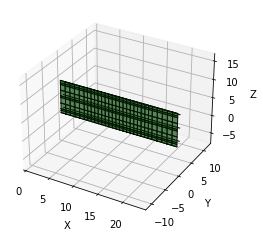

(<Figure size 432x288 with 1 Axes>, <Axes3DSubplot:xlabel='X', ylabel='Y'>)

In [7]:
variant_one_model.create_osp_model(pyfile=False)
og.opsplt.plot_model()  # plotting using Get_rendering
#og.opsv.plot_model(az_el=(-90, 0))  # plotting using ops_vis
#og.plt.show()


In [8]:

# variant_one_model = og.create_grillage(
#         bridge_name=bridge_name,
#         long_dim=L,
#         width=w,
#         skew=angle,
#         num_long_grid=n_l,
#         num_trans_grid=n_t,
#         edge_beam_dist=edge_dist,
#         model_type="shell_beam",
#         max_mesh_size_z=max_mesh_size_z,
#         max_mesh_size_x=max_mesh_size_x,
#         offset_beam_y_dist=offset_beam_y,
#         link_nodes_width=link_nodes_width,
#         beam_width = 0.445 ,
# #         multi_span_dist_list= multi_span,
# #         beam_x_spacing = transverse_spacing
#         mesh_type=mesh_type,
#         multi_span_dist_list=spans,
#         multi_span_num_points=nl_multi,
#         continuous=True,
#         #non_cont_spacing_x=stich_slab_x_spacing,
#     )

# # assign grillage member to element groups of grillage model
# variant_one_model.set_member(longitudinal_beam, member="interior_main_beam")
# variant_one_model.set_member(longitudinal_beam, member="exterior_main_beam_1")
# variant_one_model.set_member(longitudinal_beam, member="exterior_main_beam_2")
# # variant_one_model.set_member(transverse_slab, member="transverse_slab")
# # variant_one_model.set_member(end_transverse_slab, member="start_edge")
# # variant_one_model.set_member(end_transverse_slab, member="end_edge")
# variant_one_model.set_member(edge_longitudinal_beam, member="edge_beam")

In [9]:
# Compound point loads along midspan width (P is kN)
# working in global coordinate system
P = 100 * kN

p_list = [
    0,
    0+ 2.25 *m,
    0+ 2.25 *m + 2.25 *m,
    0+ 2.25 *m + 2.25 *m +2.25*m,
    w,
]  # creating list of load position

test_points_load = og.create_compound_load(name="Test 100kn")

# create point load in global coordinate
for p in p_list:
    point = og.create_load(
       loadtype = "point", name ="Point7", point1=og.create_load_vertex(x= 12 * m, z=p, p=P)
    )
    test_points_load.add_load(load_obj=point)
    

# Create load case, add loads, and assign
points_case = og.create_load_case(name="Test")
points_case.add_load(test_points_load)

variant_one_model.add_load_case(points_case)

In [10]:
variant_one_model.analyze()
results = variant_one_model.get_results()
force_array = results.forces_beam
moment = force_array.sel(Component='Mz_i')

#print(moment)

In [11]:
force_array

<xarray.DataArray 'forces_beam' (Loadcase: 1, Element: 406, Component: 30)>
array([[[ 2582.14504369, -2582.14504369,            nan, ...,
                    nan,            nan,            nan],
        [-2582.14504361,  2582.14504361,            nan, ...,
                    nan,            nan,            nan],
        [ 5817.22691768, -5817.22691768,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]]])
Coordinates:
  * Component  (Component) <U7 'Mx_i' 'Mx_j' 'Mx_k' ... 'theta_y' 'theta_z'
  * Loadcase   (Loadcase) <U4 'Test'
  * Element    (Element) int64 19 28 38 47 57 66 76 ... 903 904 905 906 907 908

In [12]:
exterior_1 = variant_one_model.get_element(member="exterior_main_beam_1", options="elements")
exterior_2 = variant_one_model.get_element(member="exterior_main_beam_2", options="elements")
interior = variant_one_model.get_element(member="interior_main_beam", options="elements")
edge_1 = variant_one_model.get_element(member="edge_beam", options="elements", z_group_num=0)
edge_2 = variant_one_model.get_element(member="edge_beam", options="elements", z_group_num=1)

extracted_bending_exterior_1 = results.forces_beam.sel(Loadcase=['Test'], Element= exterior_1 , Component="Mz_i")
extracted_bending_exterior_2 = results.forces_beam.sel(Loadcase=['Test'], Element= exterior_2 , Component="Mz_i")
extracted_bending_interior = results.forces_beam.sel(Loadcase=['Test'], Element= interior , Component="Mz_i")
extracted_bending_edge1 = results.forces_beam.sel(Loadcase=['Test'], Element= edge_1 , Component="Mz_i")
extracted_bending_edge2 = results.forces_beam.sel(Loadcase=['Test'], Element= edge_2 , Component="Mz_i")

c:\users\sokunthervy vann\cloneospgillage\ospgrillage\ospgrillage\postprocessing.py:299: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


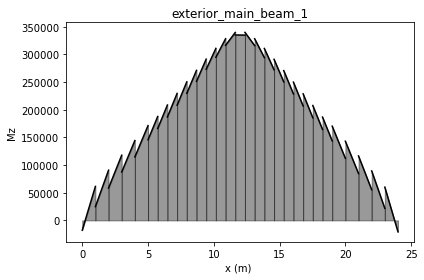

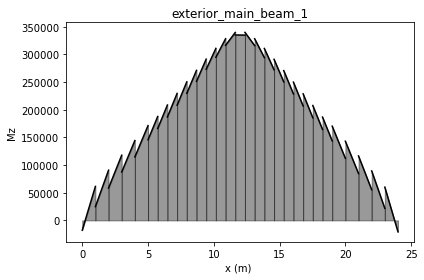

In [13]:
og.plot_force(variant_one_model, results, member="exterior_main_beam_1", component="Mz")

In [14]:
# ele_set_4m = [161,714, 690,666,148]
# ele_set_7m = [215,716,692,669,229]
# ele_set_17m = [485,726,702,678,472]
# ele_set_20m = [593,730,706,682,580]

# extracted_bending_17m = results.forces_beam.sel(Loadcase=['Test'], Element= ele_set_17m , Component="Mz_i")
# extracted_bending_7m = results.forces_beam.sel(Loadcase=['Test'], Element= ele_set_7m , Component="Mz_i")
# extracted_bending_4m = results.forces_beam.sel(Loadcase=['Test'], Element= ele_set_4m , Component="Mz_i")
# extracted_bending_20m = results.forces_beam.sel(Loadcase=['Test'], Element= ele_set_20m , Component="Mz_i")

In [15]:
moment 


<xarray.DataArray 'forces_beam' (Loadcase: 1, Element: 406)>
array([[-7.07876917e+01, -7.07876917e+01,  1.01159561e+04,
         1.01159561e+04,  3.34707906e+04,  3.34707906e+04,
         6.32425622e+04,  6.32425622e+04,  9.51487572e+04,
         9.51487571e+04,  1.26835502e+05,  1.26835502e+05,
         1.49432819e+05,  1.49432819e+05,  1.71328023e+05,
         1.71328023e+05,  1.92705346e+05,  1.92705346e+05,
         2.13940372e+05,  2.13940372e+05,  2.35567614e+05,
         2.35567614e+05,  2.58308622e+05,  2.58308622e+05,
         2.83050902e+05,  2.83050902e+05,  3.10837845e+05,
         3.10837845e+05,  3.42732761e+05,  3.42732761e+05,
         3.42648171e+05,  3.42648171e+05,  3.10577752e+05,
         3.10577752e+05,  2.82607891e+05,  2.82607891e+05,
         2.57685041e+05,  2.57685041e+05,  2.34774206e+05,
         2.34774206e+05,  2.12995334e+05,  2.12995334e+05,
         1.91634568e+05,  1.91634568e+05,  1.70166328e+05,
         1.70166328e+05,  1.48224999e+05,  1.48224999e+05,
         1.25633343e+05,  1.25633343e+05,  9.40560312e+04,
         9.40560312e+04,  6.23853928e+04,  6.23853928e+04,
         3.29425644e+04,  3.29425644e+04,  9.92235926e+03,
         9.92235926e+03, -1.77106783e+04,  2.48638911e+04,
...
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan]])
Coordinates:
    Component  <U7 'Mz_i'
  * Loadcase   (Loadcase) <U4 'Test'
  * Element    (Element) int64 19 28 38 47 57 66 76 ... 903 904 905 906 907 908

In [16]:
# p_list = [
#     0,
#     edge_dist,
#     edge_dist + 2.4 * m,
#     #edge_dist + 4.8 * m,
#     #edge_dist + 6 * m,
#     w - edge_dist,
#     w,
# ]  # creating list of load position


    # point_2 = og.create_load(
    #    loadtype = "point", name ="Point17", point1=og.create_load_vertex(x= 17 * m, z=p, p=P)
    # )
     

    # add to compound load
    # test_points_load.add_load(load_obj=point_2)